In [1]:
from IPython import get_ipython
ip = get_ipython()
if ip is not None:
    ip.run_line_magic('load_ext', 'pymor.discretizers.builtin.gui.jupyter')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='torch')
import pymor.tools.random
pymor.tools.random._default_random_state = None

The pymor.discretizers.builtin.gui.jupyter extension is already loaded. To reload it, use:
  %reload_ext pymor.discretizers.builtin.gui.jupyter


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sps
from pymor.models.iosys import LTIModel

plt.rcParams['axes.grid'] = True

In [3]:
k = 50
n = 2 * k + 1

E = sps.eye(n, format='lil')
E[0, 0] = E[-1, -1] = 0.5
E = E.tocsc()

d0 = n * [-2 * (n - 1)**2]
d1 = (n - 1) * [(n - 1)**2]
A = sps.diags([d1, d0, d1], [-1, 0, 1], format='lil')
A[0, 0] = A[-1, -1] = -n * (n - 1)
A = A.tocsc()

B = np.zeros((n, 2))
B[:, 0] = 1
B[0, 0] = B[-1, 0] = 0.5
B[0, 1] = n - 1

C = np.zeros((3, n))
C[0, 0] = C[1, k] = C[2, -1] = 1

In [4]:
fom = LTIModel.from_matrices(A, B, C, E=E)

In [5]:
fom

LTIModel(
    NumpyMatrixOperator(<101x101 sparse, 301 nnz>, source_id='STATE', range_id='STATE'),
    NumpyMatrixOperator(<101x2 dense>, range_id='STATE'),
    NumpyMatrixOperator(<3x101 dense>, source_id='STATE'),
    D=ZeroOperator(NumpyVectorSpace(3), NumpyVectorSpace(2)),
    E=NumpyMatrixOperator(<101x101 sparse, 101 nnz>, source_id='STATE', range_id='STATE'))

In [6]:
print(fom)

LTIModel
    class: LTIModel
    number of equations: 101
    number of inputs:    2
    number of outputs:   3
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(101, id='STATE')


In [7]:
print(fom.eval_tf(0))
print(fom.eval_tf(1))
print(fom.eval_tf(1j))

[[0.5        0.66666667]
 [0.625      0.5       ]
 [0.5        0.33333333]]
[[0.31606222 0.4999973 ]
 [0.39347047 0.30326476]
 [0.31606222 0.18394049]]
[[0.37281526-0.21715839j 0.55742226-0.1956196j ]
 [0.46483929-0.27336178j 0.36331911-0.23241964j]
 [0.37281526-0.21715839j 0.22541935-0.17719566j]]


In [8]:
print(fom.eval_dtf(0))
print(fom.eval_dtf(1))
print(fom.eval_dtf(1j))

[[-0.2916625  -0.25926111]
 [-0.36718437 -0.3125    ]
 [-0.2916625  -0.24073889]]
[[-0.11600655 -0.10808607]
 [-0.14598636 -0.12374206]
 [-0.11600655 -0.09196959]]
[[-0.10621989+0.18938184j -0.10083093+0.16301232j]
 [-0.13365757+0.23848281j -0.11317824+0.20350967j]
 [-0.10621989+0.18938184j -0.08260248+0.16036596j]]


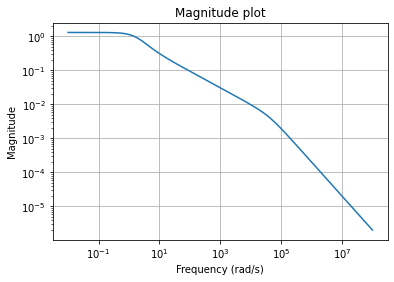

In [9]:
w = np.logspace(-2, 8, 300)
_ = fom.mag_plot(w)

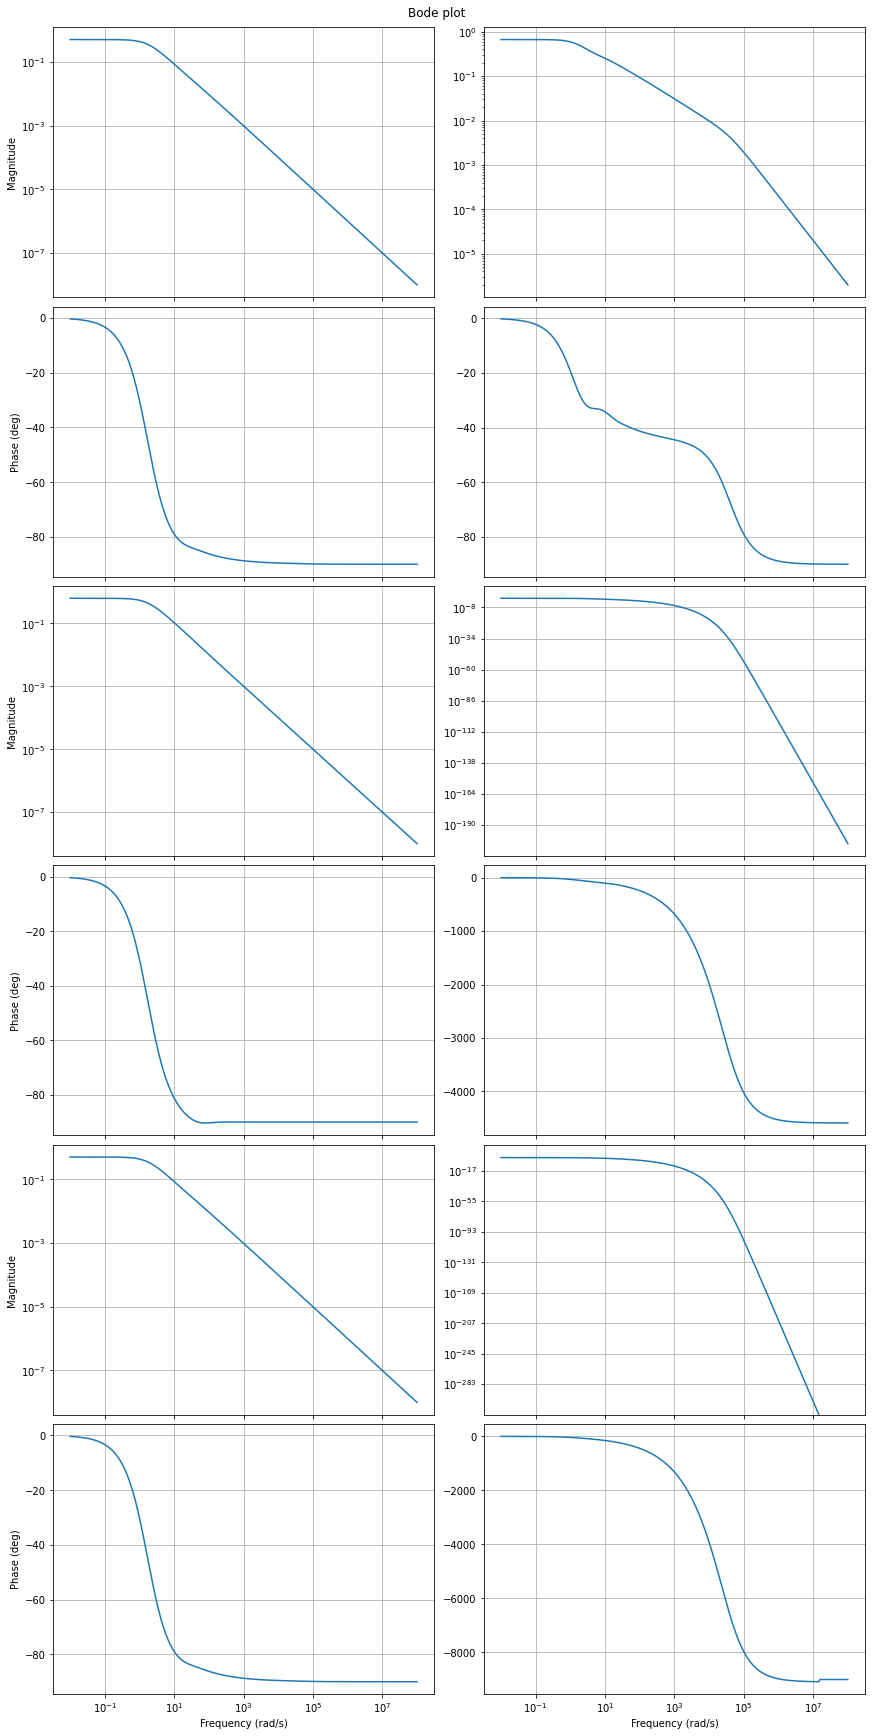

In [10]:
_ = fom.bode_plot(w)

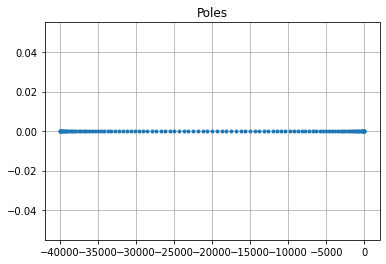

In [11]:
poles = fom.poles()
fig, ax = plt.subplots()
ax.plot(poles.real, poles.imag, '.')
_ = ax.set_title('Poles')

In [12]:
fom.gramian('c_lrcf')

NumpyVectorArray(
    [[-9.67050759e-01 -9.49603788e-01 -9.37818152e-01 ... -5.08356138e-01
      -5.03442167e-01 -4.98481264e-01]
     [-1.13133419e+00 -9.59580542e-01 -8.43810516e-01 ...  1.94699113e-01
       1.92880555e-01  1.91000976e-01]
     [ 9.08538963e-01  4.58145972e-01  2.24375612e-01 ...  9.25753046e-02
       9.17614570e-02  9.08841977e-02]
     ...
     [-4.48720858e-17  1.95466800e-15 -3.87392910e-14 ... -1.84179333e-10
       3.10420349e-11 -2.87160762e-12]
     [ 3.97648476e-18 -1.92190365e-16  4.26024322e-15 ... -2.24465928e-11
       1.75879252e-12 -8.24288506e-14]
     [-1.85127015e-17  7.70480426e-16 -1.45373940e-14 ...  1.65200046e-10
      -3.71100064e-11  4.41382006e-12]],
    NumpyVectorSpace(101, id='STATE'))

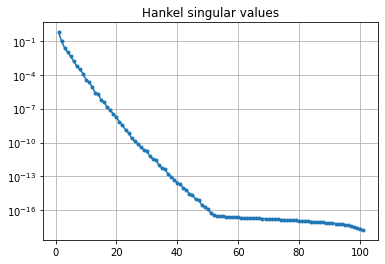

In [13]:
hsv = fom.hsv()
fig, ax = plt.subplots()
ax.semilogy(range(1, len(hsv) + 1), hsv, '.-')
_ = ax.set_title('Hankel singular values')

In [14]:
fom.h2_norm()

2.0377751533822073

In [15]:
fom.hinf_norm()

1.2890705455704852

In [16]:
fom.hankel_norm()

0.6221361786735345